<a href="https://colab.research.google.com/github/monbruin61/Pocket-Racers/blob/main/IntroToMachineLearning_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This skeleton is intended to gain intuition behind gradient descent.


In [ ]:
import numpy as np
import csv
from numpy.core.memmap import dtype
import matplotlib.pyplot as plt

# You may use these sklearn tools in your implementation, but no others.
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
WEATHER_PATH = '/content/drive/MyDrive/Copy of weatherHistory.csv'
data = np.loadtxt(WEATHER_PATH, delimiter=",", dtype=str)
data = data[:,1:-1]

header = data[0]
data = data[1:]

##Part 1: Single line fit

The temperature will be estimated using linear regression on humidity data. The results of a single feature linear regression will be compared with the closed form solution.

In [ ]:
# Right now, the data is in one large matrix. Seperate out x as the humidity
# and y as the temperature.

x = data[:, 4]
y = data[:, 2]
x = x.astype('float')
y = y.astype('float')


In [ ]:
# Code the mean squared error function given x, y, a, and b.
def MSE(x, y, a, b):
  sum = 0
  for t in range(len(x)):
    y_hat = a * x[t] + b
    error = y[t] - y_hat
    squared = error ** 2
    sum = sum + squared
  return sum / len(x)


# Code the gradient descent function. This will return the new values of a and b
# after the gradient has been calculated and the learning rate has been applied.
def grad_des(x, y, a, b, alpha):
  sum1 = 0
  sum2 = 0

  for t in range(len(x)):
    one = -2 * x[t] * y[t]
    two = 2 * a * (x[t] ** 2)
    three = 2 * x[t] * b
    thing = one + two + three
    sum1 = sum1 + thing
  partial_a = sum1 / len(x)

  for t in range(len(x)):
    one = -2 * y[t]
    two = 2 * a * x[t]
    three = 2 * b
    thing = one + two + three
    sum2 = sum2 + thing
  partial_b = sum2 / len(x)

  a2 = a - alpha * partial_a
  b2 = b - alpha * partial_b

  return a2, b2


Final Training Loss: 60.65572827768584


Text(0.5, 1.0, 'single feature loss over time')

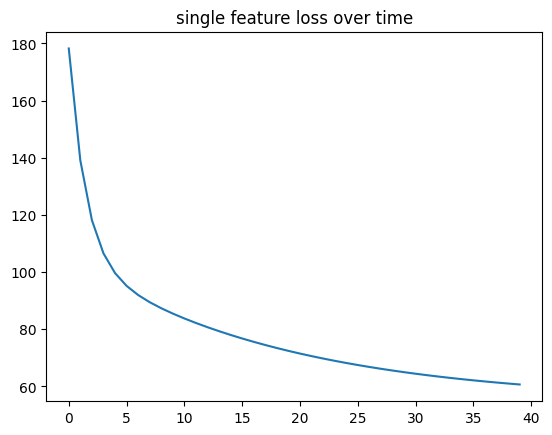

In [ ]:
# Initialize a and b.
a = 1
b = 2
lr = .55

losses = []
for i in range(40):
  losses.append(MSE(x, y, a, b))
  a, b = grad_des(x, y, a, b, lr)

print(f"Final Training Loss: {losses[-1]}")
plt.plot(losses)
plt.title("single feature loss over time")


























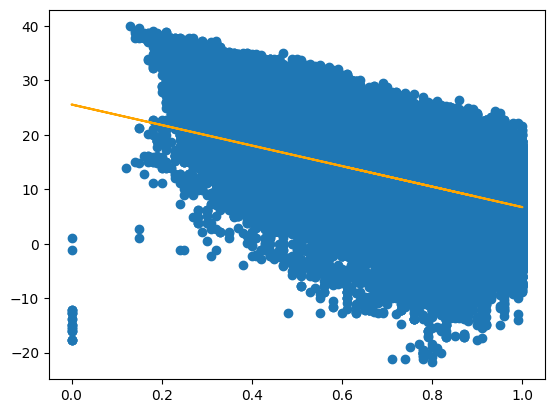

In [ ]:
# Let's take a look at what our line of best fit looks like!
plt.scatter(x, y)
plt.plot(x, a*x+b, color='orange')

In [ ]:
# Find the optimal solution using the closed form equation


X = np.vstack((x, np.ones_like(x))).T
print(X.shape)
X_T = X.T


th = np.linalg.inv(X_T @ X) @ X_T @ y
a1, b1 = th
print(th.shape)

(96453, 2)
(2,)


Grad Desc:   a: -18.864412328799045 b: 25.57320705635452 MSE: 60.34116091394204
Closed form: a: -30.894383758050832 b: 34.63692912688918 MSE: 54.76182980771795
Poly Fit:    a: -30.894383758051426 b: 34.63692912688962


Text(0.5, 1.0, 'closed and gd best fit lines')

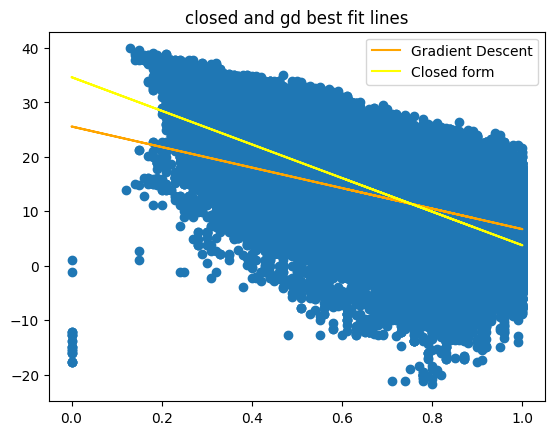

In [ ]:
# Compare our closed form with our gradient descent. The closed form solution
# should be the same thing as the result of polyfit.

a2, b2 = np.polyfit(x, y, 1)
print(f"Grad Desc:   a: {a} b: {b} MSE: {MSE(x, y, a, b)}")
print(f"Closed form: a: {a1} b: {b1} MSE: {MSE(x, y, a1, b1)}")
print(f"Poly Fit:    a: {a2} b: {b2}")

plt.scatter(x, y)
plt.plot(x, a*x+b, color='orange', label = "Gradient Descent")
plt.plot(x, a1*x+b1, color='yellow', label = "Closed form")
plt.legend()
plt.title("closed and gd best fit lines")
























##Part 2: Multiple input features

In this part, the gradient descent will be modified to accept multiple features. This will require converting the precipitation type and weather summaries to one-hot encodings.

In [ ]:
# First, lets get our x and y data one-hot encoded.
# hot_X should be the data where the categorical fields are converted into
#     one-hot encodings (temperature data excluded).
# As a sanity check, the dimensions should be (96453, 38).
# hot_y should still just be the temperature data.
x6 = data[:, 3]
x7 = data[:, 4]
x8 = data[:, 5]
x9 = data[:, 6]
x10 = data[:, 7]
x11 = data[:, 8]
x12 = data[:, 9]
x13 = np.vstack((x6, x7, x8, x9, x10, x11, x12, np.ones_like(x6))).T
print(x13.shape)

x1 = data[:, 0]
x2 = data[:, 1]
def one_hot(array):
    unique, inverse = np.unique(array, return_inverse=True)
    onehot = np.eye(unique.shape[0])[inverse]
    return onehot
x3 = one_hot(x1)
print(x3.shape)
x4 = one_hot(x2)
print(x4.shape)

#Note: hot_X and hot_Y aren't just the one-hot columns, they also include other columns, bad naming on my part

x5 = np.hstack((x3, x4))
print(x5.shape)
x14 = np.hstack((x5, x13))
print(x14.shape)
hot_X = x14
hot_X = hot_X.astype(float)
hot_Y = data[:, 2]
hot_Y = hot_Y.astype(float)
hot_Y = hot_Y.reshape(-1, 1)
print(hot_Y.shape)
print((hot_X.T).shape)

(96453, 8)
(96453, 27)
(96453, 3)
(96453, 30)
(96453, 38)
(96453, 1)
(38, 96453)


In [ ]:
from types import LambdaType
def grad_des2(X, y, theta, alpha):
  X_T = X.T
  first = -2 * (X_T @ y)
  second = 2 * X_T @ X @ theta
  grad_L = (first + second) / (len(y))
  theta_next = theta - (alpha * grad_L)
  return theta_next

def MSE2(x, y, theta):
  first = (y - x @ theta).T
  second = (y - x @ theta)
  L = (first @ second) / (len(y))
  return L[0][0]


233.61990593832368
Final Training Loss: 92.84887574248523


Text(0.5, 1.0, 'Multi feature loss over time')

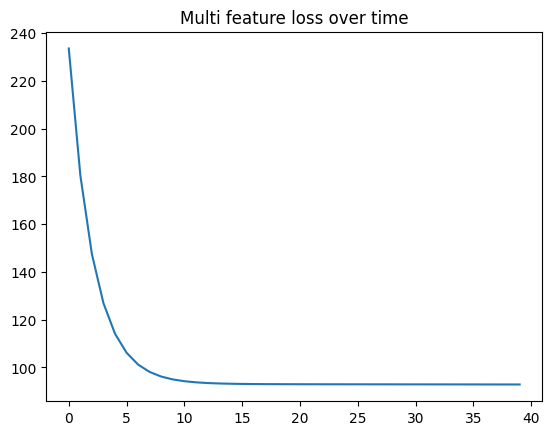

In [ ]:
lr = 1e-7

theta = np.zeros((len(hot_X[0]), 1))
#ohhh, since theta gets updated, starting with zeroes isnt a bad idea

losses = []
print(MSE2(hot_X, hot_Y, theta))

for i in range(40):
  losses.append(MSE2(hot_X, hot_Y, theta))
  theta = grad_des2(hot_X, hot_Y, theta, lr)


print(f"Final Training Loss: {losses[-1]}")
plt.plot(losses)
plt.title("Multi feature loss over time")


























In [ ]:
# Now solve for theta using the closed form and compare your final training loss between
# the closed form and regression solution

X_T = hot_X.T
print(X_T.shape)
print(hot_X.shape)
th2 = np.linalg.pinv(X_T @ hot_X) @ X_T @ hot_Y
MSE2(hot_X, hot_Y, th2)

(38, 96453)
(96453, 38)


0.8821996506580477

As you can (probably) see, the gradient descent error is worse than the single input version and much worse than the closed form solution. To minimize the loss, using minibatch gradient descent should allow the model to traverse through any local minimums and reach the absolute minimum.

Final Training Loss: 0.4520565998071489


Text(0.5, 1.0, 'Modified multi feature loss over time')

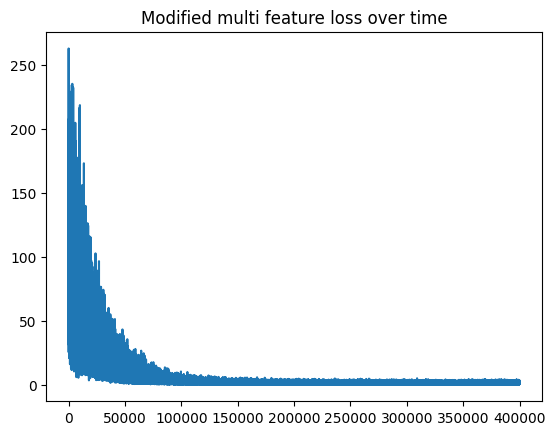

In [ ]:
lr = 1e-7
#I decreased the learning rate since it appeared to not converge to a minimum.
theta = np.zeros((len(hot_X[0]), 1))
theta = theta.reshape(-1,1)

losses = []
folds = 10000

for u in range(40):
  #reorganizes the order of items/elements

  hot_X_train, hot_Y_train = shuffle(hot_X, hot_Y)
  hot_X_folds = np.array_split(hot_X_train, folds)
  hot_Y_folds = np.array_split(hot_Y_train, folds)
  for i in range(folds): #so basically finding the correct theta value
    # Do gradient descent
    # losses.append(MSE2(hot_X, hot_Y, theta))
    # theta = grad_des2(hot_X, hot_Y, theta, lr)
    losses.append(MSE2(hot_X_folds[i], hot_Y_folds[i], theta))
    theta = grad_des2(hot_X_folds[i], hot_Y_folds[i], theta, lr)



print(f"Final Training Loss: {losses[-1]}")
plt.plot(losses)
plt.title("Modified multi feature loss over time")




























##Part 3: Logistic Regression and K-fold Cross Validation

In this part of the lab, health statistics will be used to estimate if someone will suffer a heart attack in the next 10 years. This time, we will be using K-fold cross validation to determine the viability of our model.

In [ ]:
HAM_PATH = '/content/drive/MyDrive/Copy of framingham.csv'
health_data = np.loadtxt(HAM_PATH, delimiter=",", dtype=str)

# But wait! The data is not complete! Take a look to see what is wrong with it
# and remove any offending datapoints (rows) - this is the "cleaning" stage of
# the ML pipeline.
# Challange: do this in one line.
health_data = health_data[~np.any(np.char.find(health_data, "NA") != -1, axis = 1)]

In [ ]:
# Create your X and Y data and clean it! Binarize the assigned-sex-at-birth
# column and add the bias term to your X data

#add the 1st column and bias column to x.

health_x = health_data[1:,1:-1]

print(health_x.shape)
first = health_data[1:,0]
print(first.shape)
first = np.asarray(first, dtype = np.dtype('i4'))
first = first.reshape(-1, 1)

second = one_hot(first)
print(second.shape)
health_x = np.hstack((health_x, second))
print(health_x.shape)
health_x = np.hstack((health_x, np.ones_like(first)))
print(health_x.shape)

#start at 1 index,
health_y = health_data[1:,-1]
health_y = health_y.reshape(-1,1)
print(health_y.shape)

#Clean it up!

health_x = health_x.astype('double')
health_y = health_y.astype('double')

(3656, 14)
(3656,)
(3656, 2)
(3656, 16)
(3656, 17)
(3656, 1)


In [ ]:
# Separate your training data into 5 folds for cross validation

#splits dataset into random subsets, so approx 2924 of the 3656 items go to the training matrices while the otehr 732 go to the testing ones.
X_train, X_test, y_train, y_test = train_test_split(health_x, health_y, test_size=0.2, random_state=0)
#reorganizes the order of items/elements
X_train, y_train = shuffle(X_train, y_train)
k = 5

print(X_train.shape)

X_folds = []
y_folds = []
#DOESNT HAVE ANY ELEMENTS, can't use = to assign, must use append to add new elements first

#So as long as the number of columns doesn't change, we're chillin.
#Since 2924 can't be divided by 5, ill give 4 585, while the last one gets 584.
leng = len(X_train[:,0])
divis = int(leng / k)+1 #the plus 1 is just random
begin = 0
end =  divis

# for i in range(k):
#   begin = divis*i
#   end = divis * i + divis
#   if i < 4:
#     X_folds.append(X_train[begin:end,:])
#     y_folds.append(y_train[begin:end,:])
#   else:
#     X_folds.append(X_train[begin:,:])
#     y_folds.append(y_train[begin:,:])

bom1 = np.array_split(X_train, 5)
bom2 = np.array_split(y_train, 5)
for i in range(5):
  X_folds.append(bom1[i])
  y_folds.append(bom2[i])

# A quick check:
for fold in range(k):
  print(X_folds[fold].shape)
  print(y_folds[fold].shape)

(2924, 17)
(585, 17)
(585, 1)
(585, 17)
(585, 1)
(585, 17)
(585, 1)
(585, 17)
(585, 1)
(584, 17)
(584, 1)


In [ ]:
# Now lets code all of our relevant equations.

def sigmoid(x): #let's assume that what's being passed in is actually X @ theta
  denom = 1 + np.exp(-1 * x)
  return 1 / (denom + 1e-10)

def accuracy(X1, y1, theta): #literally calculates the loss/error.
  inpute = X1 @ theta

  prediction = sigmoid(inpute)
  prediction = np.round(prediction)

  correct = 0
  total = len(prediction)
  for u in range(total):
    if prediction[u] == y1[u]:
      correct += 1

  return correct/total

def cross_entropy_loss(X, y, theta):
    xthe = X @ theta
    xthe = xthe.reshape(-1,1)
    sigmer = sigmoid(xthe)

    first = -y * np.log2(sigmer + 1e-10)
    second = -(1 - y) * np.log2(1 - sigmer + 1e-10)
    thing = first + second
    return sum(thing)/len(thing)

def log_grad_desc(X, y_hat, y, alpha, theta): #the value we pass in for y-hat will be sigmoid(X @ theta)

  #ok so literally look at the last equation (8) and literally the square brackets with XT's either has to be transpose of X or just X
  dell_L = (1/len(y)) * ((X.T) @ (y_hat - y))
  theta_next = theta - (alpha * dell_L)
  return theta_next

In [ ]:
# Now lets validate our model. Use the validation error to tune your
#hyperparameters. Also, compare your validation and training errors

lr = 6e-4

val_losses = []
train_losses = []
for fold in range(k):
  theta = np.random.randn(health_x.shape[1]) # Reinitialize theta, ohhh since shape is (n,m) , shape[1] is just (n), ie this entire line just extracts a row
  theta = theta.reshape(-1,1)
  # Set your validation and training datasets
  X_val = X_folds[fold]
  y_val = y_folds[fold]
  #X_val = X_folds[k] , train

  X_2train = X_folds
  y_2train = y_folds

  X_dum = np.delete(X_2train, fold)
  y_dum = np.delete(y_2train, fold)
  leng = len(X_2train)
  #so now we want to combine all the folds...
  X_2train = np.vstack((X_dum[0], X_dum[1], X_dum[2], X_dum[3]))
  y_2train = np.vstack((y_dum[0], y_dum[1], y_dum[2], y_dum[3]))



  xthe = X_2train @ theta
  y_hat = sigmoid(xthe)
  y_hat = y_hat.reshape(-1,1)

  for i in range(5000): #so basically finding the correct theta value
    # Do gradient descent
    theta = log_grad_desc(X_2train, y_hat, y_2train, lr, theta)
  train_losses.append(cross_entropy_loss(X_2train, y_2train, theta))
  #should the line be right after the gradient descent? or should it be after val_losses?
  #if so, what would my x and y argument be?
  print(accuracy(X_2train, y_2train, theta))

  val_losses.append(cross_entropy_loss(X_val, y_val, theta)) #even if x val and y val dont change, theta does so its good data



print(f"train_losses: {sum(train_losses)/len(train_losses)}")
print(f"val_losses: {sum(val_losses)/len(val_losses)}")

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:5071: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


0.14749893116716545
0.15348439504061565
0.15476699444206926
0.8465156049593844
0.8431623931623932
train_losses: [18.45651377]
val_losses: [18.20162841]


<ipython-input-18-b62d950050b5>:4: RuntimeWarning: overflow encountered in exp
  denom = 1 + np.exp(-1 * x)


In [ ]:
# Training - once you have tuned your hyperparameters, train your model once
# more on all the training data and then test it on the test dataset

lr = 6e-4
#theta = np.random.randn(health_x.shape[1]) #why isn't theta initialized to just ones??
theta = np.random.randn(health_x.shape[1])
theta = theta.reshape(-1,1)

  #this time, don't reset theta, also combine all the folds
xthe = X_train @ theta
y_hat = sigmoid(xthe)
y_hat = y_hat.reshape(-1,1)
print(y_hat.shape)


for i in range(6000): #so basically finding the correct theta value
  # Do gradient descent
  theta = log_grad_desc(X_train, y_hat, y_train, lr, theta)

print(f"Testing Accuracy: {accuracy(X_test, y_test, theta)}")

(2924, 1)
Testing Accuracy: 0.8510928961748634


<ipython-input-18-b62d950050b5>:4: RuntimeWarning: overflow encountered in exp
  denom = 1 + np.exp(-1 * x)
